# Fit Log

In [1]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


### Read DataFrames

In [2]:
df_data = pd.read_csv(f"{DATADIR}/5-10-21/logaritmico/data.csv")

df_errors = abs(.5/100. * df_data) # 0.5 %
df_errors[:10] += 0.001 # 1dgt
df_errors[10:] += 0.01 # 1dgt
df_data, df_errors

(    Vin [V]  Vout [V]
 0     0.568    -0.548
 1     0.880    -0.564
 2     1.099    -0.577
 3     1.377    -0.586
 4     1.642    -0.596
 5     2.047    -0.605
 6     2.498    -0.613
 7     3.035    -0.620
 8     3.664    -0.627
 9     4.080    -0.630
 10    4.620    -0.635
 11    5.120    -0.638
 12    5.640    -0.641
 13    6.240    -0.645
 14    7.020    -0.648
 15    7.760    -0.649
 16    8.480    -0.652
 17    9.310    -0.653
 18   10.090    -0.657
 19   12.310    -0.659,
      Vin [V]  Vout [V]
 0   0.003840  0.003740
 1   0.005400  0.003820
 2   0.006495  0.003885
 3   0.007885  0.003930
 4   0.009210  0.003980
 5   0.011235  0.004025
 6   0.013490  0.004065
 7   0.016175  0.004100
 8   0.019320  0.004135
 9   0.021400  0.004150
 10  0.033100  0.013175
 11  0.035600  0.013190
 12  0.038200  0.013205
 13  0.041200  0.013225
 14  0.045100  0.013240
 15  0.048800  0.013245
 16  0.052400  0.013260
 17  0.056550  0.013265
 18  0.060450  0.013285
 19  0.071550  0.013295)

### Convert to arrays of uncertainties

In [3]:
Vin_arr = pair_dat_err(df_data['Vin [V]'], df_errors['Vin [V]'])
Vout_arr = pair_dat_err(df_data['Vout [V]'], df_errors['Vout [V]'])

### Canvas

In [4]:
canvas = ROOT.TCanvas("c1", "log fit 1", 1000, 500)

#canvas.SetLogx(True)

### GraphErrors

In [5]:
fit_log_graph_err = uncertainties_to_root_graph_errors(Vin_arr[:-4], Vout_arr[:-4])

fit_log_graph_err.SetTitle("Amplificatore in configurazione logaritmica invertente")
fit_log_graph_err.GetXaxis().SetTitle("Vin [V]")
fit_log_graph_err.GetYaxis().SetTitle("Vout [V]")
fit_log_graph_err.SetMarkerStyle(21)
fit_log_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [6]:
R = ufloat(1995, 19.951)
#function_formula = "- 2 * [0] * log(x / (1995 * [1]))"
function_formula = "-0.575 - 2 * [0] * log(x)"
#function_formula = "- 2 * [0] * log(x / (2015 * [1]))"
fit_f = ROOT.TF1("fit1", function_formula)

In [7]:
fit_f.SetLineColor(4)

In [8]:
fit_f.SetParName(0, "V_{T}")
fit_f.SetParName(1, "I_{0}")
fit_f.SetParameter(0, 0.026)
#fit_f.SetParameter(1, 1e-6)
#fit_f.SetParLimits(0, 0.025, 0.027)
ROOT.gStyle.SetOptFit(True)

### Draw

 FCN=5.21903 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          30 TOTAL
                     EDM=7.29162e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  V_{T}        2.00453e-02   6.89740e-04   6.89740e-04   1.75082e-01


Info in <TCanvas::Print>: pdf file ./output/fit_log_vout_vin.pdf has been created


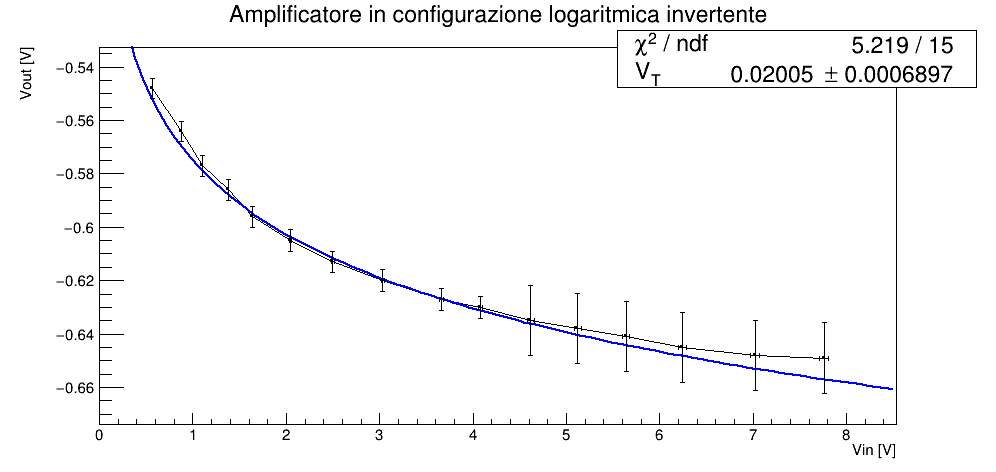

In [9]:
canvas.Draw()
fit_log_graph_err.Draw()
fit_log_graph_err.Fit(fit_f, "MSE")
canvas.SaveAs(f"{OUTPUTDIR}/fit_log_vout_vin.pdf")

In [10]:
V_t = fit_f.GetParameter(0)
V_t_error = fit_f.GetParError(0)
V_t_exp = 0.026

(V_t - V_t_exp)/V_t_error

-8.633304402314131

In [11]:
k_b = 8.3145/6.022e23
q = 1.6e-19
T = V_t * q / k_b - 273.15
T

-40.856854772112655

In [12]:
V_T = ufloat(fit_f.GetParameter(0), fit_f.GetParError(0))
R = ufloat(1995, 19,951)
k = ufloat(-0.575, 0.001)

In [13]:
from uncertainties.umath import exp as uexp
I_0 = uexp(k / (2 * V_T)) / R
I_0

2.959180063026494e-10+/-1.4625330864197685e-10